# Python Code for Individual Research Project by Hannah Wouters

## Data cleaning and preparation

### All packages I will need for the analyses

In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
import psython as psy
import pingouin as pg
from scipy.stats import contingency 
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

### Reading in the data

In [2]:
data = "group21_alltogether.csv"

df = pd.read_csv(data)

In [3]:
#Checking what we are working with
df.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
0,485,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 16:57:47,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
1,488,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,http://localhost/group11/,2024-06-14 17:04:36,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
2,489,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:17:38,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
3,492,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,1,http://localhost/group11/,2024-06-14 17:19:24,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data
4,497,3,2,2,2,NaN,NaN,NaN,NaN,NaN,...,0,1.5,2024-06-15 20:56:12,NaN,NaN,NaN,NaN,NaN,NaN,both in master and using data


In [4]:
df.shape

(136, 57)

In [5]:
df.columns

Index(['userid', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'age', 'gender', 'device', 'education', 'time', 'condition',
       'prolific', 'timestart', 'genre', 'consent', 'mancheck1', 'mancheck2',
       'calibrationid', 'recommendationid', '_merge'],
      dtype='object')

### Dropping the users that answered before 2024-06-21 14:00

In [6]:
#first checking the column
df["timestart"].describe()

count                     136
unique                    136
top       2024-06-14 16:57:47
freq                        1
Name: timestart, dtype: object

In [7]:
df["timestart"].max()

'2024-06-23 23:47:10'

In [8]:
df["timestart"].min()

'2024-06-14 16:57:47'

In [9]:
#Convert the date
df['timestart'] = pd.to_datetime(df['timestart'])

In [10]:
df['timestart']

0     2024-06-14 16:57:47
1     2024-06-14 17:04:36
2     2024-06-14 17:17:38
3     2024-06-14 17:19:24
4     2024-06-15 20:56:12
              ...        
131   2024-06-22 21:18:03
132   2024-06-23 01:38:36
133   2024-06-23 15:17:58
134   2024-06-23 16:17:09
135   2024-06-23 23:47:10
Name: timestart, Length: 136, dtype: datetime64[ns]

In [11]:
 # Filter data between two dates -> used this https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
filtered_df = df.loc[(df['timestart'] >= '2024-06-21 14:00')
                     & (df['timestart'] <= '2024-06-23 23:47:10')]

In [12]:
filtered_df.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
50,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data
51,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data
52,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,0,https://recipe-study.wur.nl/gr,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data
53,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data
54,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data


In [13]:
print(f'Original df was {df.shape}')
print(f'Filtered df is {filtered_df.shape}')

Original df was (136, 57)
Filtered df is (86, 57)


In [14]:
print(f'Removed {len(df)-len(filtered_df)} values from the original DF')

Removed 50 values from the original DF


### Removing Data based on Prolific

In [15]:
filtered_df['prolific'].value_counts()

prolific
https://recipe-study.wur.nl/gr                          76
https://recipe-study.wur.nl/group21_bookrecommender/     6
fbclid=PAZXh0bgNhZW0CMTEAAab6i                           1
fbclid=PAZXh0bgNhZW0CMTEAAabVk                           1
fbclid=PAZXh0bgNhZW0CMTEAAaZaA                           1
fbclid=PAZXh0bgNhZW0CMTEAAaY85                           1
Name: count, dtype: int64

In [16]:
values_to_keep = ['https://recipe-study.wur.nl/gr']

filtered_df2 = filtered_df[filtered_df['prolific'].isin(values_to_keep)]

In [17]:
filtered_df2['prolific'].value_counts()

prolific
https://recipe-study.wur.nl/gr    76
Name: count, dtype: int64

In [18]:
filtered_df2.shape

(76, 57)

In [19]:
print(f'Original df was {filtered_df.shape}')
print(f'Filtered df is {filtered_df2.shape}')

Original df was (86, 57)
Filtered df is (76, 57)


### Dropping Nan Results

In [20]:
filtered_df3=filtered_df2.dropna()

In [21]:
filtered_df3.head()

,userid,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,condition,prolific,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge
50,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data
51,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data
52,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,0,https://recipe-study.wur.nl/gr,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data
53,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data
54,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,1,https://recipe-study.wur.nl/gr,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data


In [22]:
filtered_df3.shape

(66, 57)

In [23]:
print(f'Original df was {filtered_df2.shape}')
print(f'Filtered df is {filtered_df3.shape}')

Original df was (76, 57)
Filtered df is (66, 57)


### Renaming Columns

In [24]:
filtered_df3.rename(columns={'Q2': 'satisfaction_1', 'Q3': 'satisfaction_2', 'Q4': 'satisfaction_3', 'Q5': 'satisfaction_4', 'Q6': 'satisfaction_5', 'Q7': 'satisfaction_6'}, inplace=True)

/var/folders/wp/4_jtn9zx1v1_c66jqrb898k00000gn/T/ipykernel_33804/2120619129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q2': 'satisfaction_1', 'Q3': 'satisfaction_2', 'Q4': 'satisfaction_3', 'Q5': 'satisfaction_4', 'Q6': 'satisfaction_5', 'Q7': 'satisfaction_6'}, inplace=True)


In [25]:
filtered_df3.rename(columns={'Q8': 'credibility_1', 'Q9': 'credibility_2', 'Q10': 'credibility_3', 'Q11': 'credibility_4', 'Q12': 'credibility_5', 'Q13': 'credibility_6', 'Q14': 'credibility_7', 'Q15': 'credibility_8', 'Q16': 'credibility_9', 'Q17': 'credibility_10', 'Q18': 'credibility_11', 'Q19': 'credibility_12'}, inplace=True)

/var/folders/wp/4_jtn9zx1v1_c66jqrb898k00000gn/T/ipykernel_33804/1841839145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q8': 'credibility_1', 'Q9': 'credibility_2', 'Q10': 'credibility_3', 'Q11': 'credibility_4', 'Q12': 'credibility_5', 'Q13': 'credibility_6', 'Q14': 'credibility_7', 'Q15': 'credibility_8', 'Q16': 'credibility_9', 'Q17': 'credibility_10', 'Q18': 'credibility_11', 'Q19': 'credibility_12'}, inplace=True)


In [26]:
filtered_df3.rename(columns={'Q20': 'motivation_1', 'Q21': 'motivation_2', 'Q22': 'motivation_3', 'Q23': 'motivation_4', 'Q24': 'motivation_5', 'Q25': 'motivation_6', 'Q26': 'motivation_7', 'Q27': 'motivation_8', 'Q28': 'motivation_9', 'Q29': 'motivation_10', 'Q30': 'motivation_11', 'Q31': 'motivation_12'}, inplace=True)

/var/folders/wp/4_jtn9zx1v1_c66jqrb898k00000gn/T/ipykernel_33804/4024581968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q20': 'motivation_1', 'Q21': 'motivation_2', 'Q22': 'motivation_3', 'Q23': 'motivation_4', 'Q24': 'motivation_5', 'Q25': 'motivation_6', 'Q26': 'motivation_7', 'Q27': 'motivation_8', 'Q28': 'motivation_9', 'Q29': 'motivation_10', 'Q30': 'motivation_11', 'Q31': 'motivation_12'}, inplace=True)


In [27]:
filtered_df3.rename(columns={'Q32': 'anthropomorphism_1', 'Q33': 'anthropomorphism_2', 'Q34': 'anthropomorphism_3', 'Q35': 'anthropomorphism_4'}, inplace=True)

/var/folders/wp/4_jtn9zx1v1_c66jqrb898k00000gn/T/ipykernel_33804/2626641718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q32': 'anthropomorphism_1', 'Q33': 'anthropomorphism_2', 'Q34': 'anthropomorphism_3', 'Q35': 'anthropomorphism_4'}, inplace=True)


In [28]:
filtered_df3.rename(columns={'Q36': 'control(reading_habits)', 'Q37': 'control(previous_experience_with_RS)'}, inplace=True)

/var/folders/wp/4_jtn9zx1v1_c66jqrb898k00000gn/T/ipykernel_33804/1940005018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q36': 'control(reading_habits)', 'Q37': 'control(previous_experience_with_RS)'}, inplace=True)


In [29]:
filtered_df3.rename(columns={'Q38': 'conscientiousness_1', 'Q39': 'conscientiousness_2', 'Q40': 'conscientiousness_3', 'Q41': 'conscientiousness_4', 'Q42': 'conscientiousness_5'}, inplace=True)

/var/folders/wp/4_jtn9zx1v1_c66jqrb898k00000gn/T/ipykernel_33804/3687310035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df3.rename(columns={'Q38': 'conscientiousness_1', 'Q39': 'conscientiousness_2', 'Q40': 'conscientiousness_3', 'Q41': 'conscientiousness_4', 'Q42': 'conscientiousness_5'}, inplace=True)


In [30]:
filtered_df3.columns

Index(['userid', 'satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6', 'credibility_1',
       'credibility_2', 'credibility_3', 'credibility_4', 'credibility_5',
       'credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12', 'motivation_1',
       'motivation_2', 'motivation_3', 'motivation_4', 'motivation_5',
       'motivation_6', 'motivation_7', 'motivation_8', 'motivation_9',
       'motivation_10', 'motivation_11', 'motivation_12', 'anthropomorphism_1',
       'anthropomorphism_2', 'anthropomorphism_3', 'anthropomorphism_4',
       'control(reading_habits)', 'control(previous_experience_with_RS)',
       'conscientiousness_1', 'conscientiousness_2', 'conscientiousness_3',
       'conscientiousness_4', 'conscientiousness_5', 'age', 'gender', 'device',
       'education', 'time', 'condition', 'prolific', 'timestart', 'genre',
       'consent', 'manch

### Saving CSV

In [31]:
filtered_df3.to_csv("results.csv", index = False)

### Removing those who did not consent and are under 18

In [32]:
data = "results.csv"

df = pd.read_csv(data)

In [57]:
df = df[(df["consent"] == 1) & (df["age"] >= 18)]

In [58]:
df['consent'].value_counts()

consent
1.0    64
Name: count, dtype: int64

In [59]:
#saving those that consented, and are above 18 to a csv
df.to_csv("filtered.csv", index = False)

### Making new variables

In [60]:
#make the variable satisfaction
df['satisfaction'] = df[['satisfaction_1', 'satisfaction_2', 'satisfaction_3', 'satisfaction_4', 'satisfaction_5', 'satisfaction_6']].mean(axis=1)

In [61]:
#make the variable motivation
df['motivation'] = df[['motivation_1', 'motivation_2', 'motivation_3', 'motivation_4', 'motivation_5', 'motivation_6', 'motivation_7']].mean(axis=1)

### Removing -1 values from manipulation check

In [62]:
df = df[df['mancheck1'] != -1]

In [63]:
df.to_csv('filtered.csv', index = False)

## Exploratory Analysis

In [64]:
df.head()

,userid,satisfaction_1,satisfaction_2,satisfaction_3,satisfaction_4,satisfaction_5,satisfaction_6,credibility_1,credibility_2,credibility_3,...,timestart,genre,consent,mancheck1,mancheck2,calibrationid,recommendationid,_merge,satisfaction,motivation
0,599,4,2,2,2,2.0,2.0,4.0,2.0,2.0,...,2024-06-21 14:06:27,3.0,1.0,0.0,2.0,683.0,2017.0,both in master and using data,2.333333,3.000000
1,600,7,7,7,7,7.0,7.0,5.0,5.0,5.0,...,2024-06-21 14:29:48,1.0,1.0,0.0,4.0,769.0,1841.0,both in master and using data,7.000000,3.285714
2,601,4,4,4,4,4.0,4.0,7.0,7.0,7.0,...,2024-06-21 14:33:58,1.0,1.0,1.0,4.0,305.0,304.0,both in master and using data,4.000000,7.000000
3,602,6,7,6,5,5.0,7.0,7.0,4.0,5.0,...,2024-06-21 14:35:16,1.0,1.0,1.0,4.0,417.0,418.0,both in master and using data,6.000000,3.857143
4,603,6,7,7,7,6.0,7.0,6.0,7.0,7.0,...,2024-06-21 14:39:19,1.0,1.0,1.0,3.0,1277.0,1276.0,both in master and using data,6.666667,4.714286


In [65]:
df.shape

(64, 59)

In [66]:
df.columns

Index(['userid', 'satisfaction_1', 'satisfaction_2', 'satisfaction_3',
       'satisfaction_4', 'satisfaction_5', 'satisfaction_6', 'credibility_1',
       'credibility_2', 'credibility_3', 'credibility_4', 'credibility_5',
       'credibility_6', 'credibility_7', 'credibility_8', 'credibility_9',
       'credibility_10', 'credibility_11', 'credibility_12', 'motivation_1',
       'motivation_2', 'motivation_3', 'motivation_4', 'motivation_5',
       'motivation_6', 'motivation_7', 'motivation_8', 'motivation_9',
       'motivation_10', 'motivation_11', 'motivation_12', 'anthropomorphism_1',
       'anthropomorphism_2', 'anthropomorphism_3', 'anthropomorphism_4',
       'control(reading_habits)', 'control(previous_experience_with_RS)',
       'conscientiousness_1', 'conscientiousness_2', 'conscientiousness_3',
       'conscientiousness_4', 'conscientiousness_5', 'age', 'gender', 'device',
       'education', 'time', 'condition', 'prolific', 'timestart', 'genre',
       'consent', 'manch

### Descriptives and visualisation

#### Condition

In [67]:
df['condition'].value_counts()

condition
1    41
0    23
Name: count, dtype: int64

<Axes: xlabel='condition', ylabel='count'>

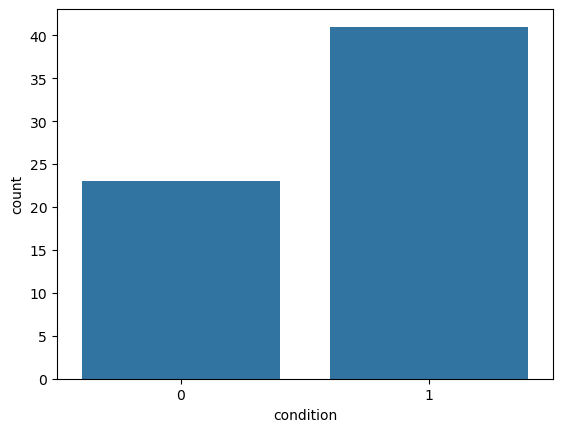

In [68]:
sns.countplot(x='condition', data=df)

#### Education

In [48]:
df['education'].value_counts()

education
2.0    39
4.0    14
5.0     9
3.0     1
1.0     1
Name: count, dtype: int64

In [51]:
df['education'].describe()

count    64.000000
mean      2.859375
std       1.206690
min       1.000000
25%       2.000000
50%       2.000000
75%       4.000000
max       5.000000
Name: education, dtype: float64

<Axes: xlabel='education', ylabel='Count'>

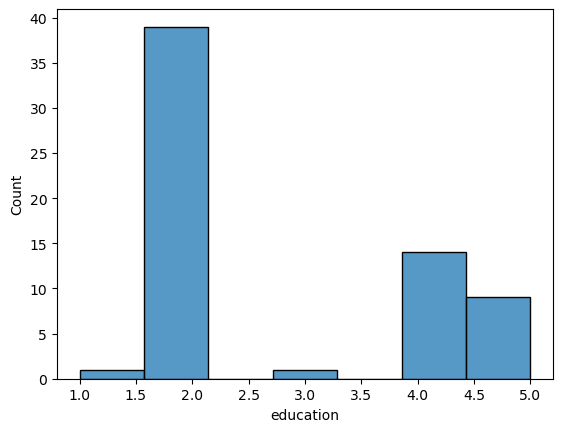

In [52]:
sns.histplot(x = 'education', data = df)

#### Gender

In [49]:
df['gender'].value_counts()

gender
1.0    47
2.0    17
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

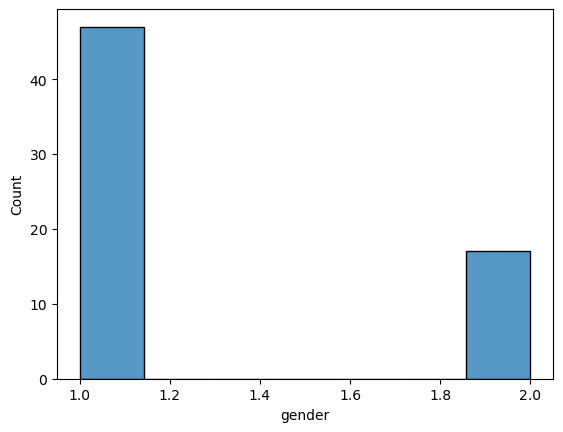

In [53]:
sns.histplot(x = 'gender', data = df)

#### Age

In [69]:
df['age'].describe()

count    64.000000
mean     29.375000
std      16.757372
min      19.000000
25%      20.000000
50%      21.000000
75%      24.250000
max      74.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

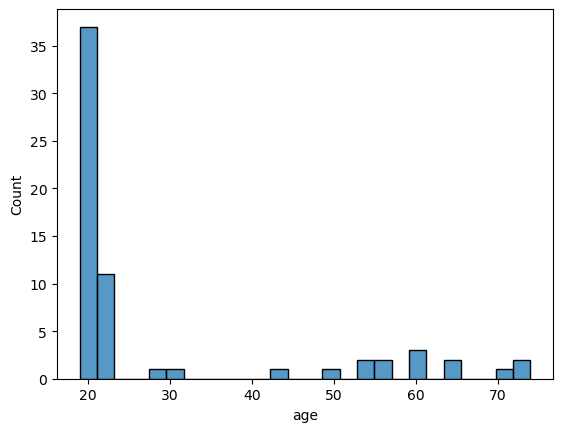

In [55]:
sns.histplot(x = 'age', data = df)

## Randomization Checks

### Gender

In [87]:
#Crosstab for gender
mycrosstab = pd.crosstab(df['gender'], df["condition"])
mycrosstab

condition,0,1
gender,,
1.0,15,32
2.0,8,9


In [84]:
#Chisquare analysis for gender
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# Cramer's V 
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(1) = 0.673, p = 0.412 
V = 0.139


### Education

In [85]:
#crosstab for education
mycrosstab = pd.crosstab(df['education'], df["condition"])
mycrosstab

condition,0,1
education,,
1.0,1,0
2.0,14,25
3.0,1,0
4.0,2,12
5.0,5,4


In [86]:
# Chisquare analysis for education
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# Cramer's V for education
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(4) = 7.921, p = 0.095 
V = 0.352


### Age

In [88]:
#Using a t-test to check randomization for the variable age
(label1, values1), (label2, values2) = df.groupby('condition')['age']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=31.52, SD=18.443) with 1 (M=28.17, SD=15.383), t(38.921246238017)=0.725, p=0.4729.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.724762,38.921246,two-sided,0.472933,"[-6.0, 12.7]",0.199313,0.329,0.117107


### Reading frequency - Control variable

In [90]:
#Using a t-test to check randomization for the control variable reading habits
(label1, values1), (label2, values2) = df.groupby('condition')['control(reading_habits)']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=4.22, SD=1.768) with 1 (M=4.22, SD=1.660), t(42.954431202754535)=-0.005, p=0.9963.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.004617,42.954431,two-sided,0.996338,"[-0.93, 0.92]",0.001228,0.264,0.050002


### Previous experience with Recommender Systems

In [91]:
#Using a t-test to check randomization for the control variable previous experience
(label1, values1), (label2, values2) = df.groupby('condition')['control(previous_experience_with_RS)']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=3.65, SD=1.991) with 1 (M=3.61, SD=1.949), t(44.49458981495145)=0.081, p=0.9359.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.080852,44.49459,two-sided,0.935923,"[-1.01, 1.1]",0.021253,0.265,0.050739


## Factor analysis

### Satisfaction

In [70]:
#for satisfaction
items = df[['satisfaction_1','satisfaction_2','satisfaction_3','satisfaction_4','satisfaction_5', 'satisfaction_6']]

#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(items)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(items)
print(kmo_model)

398.9874084290611 1.1290238187686243e-75
0.8789911143153291


In [92]:
# perform the factor analysis using the FactorAnalyzer class. You can specify the number of factors you want to extract using the n_factors parameter:
fa = FactorAnalyzer(n_factors = 1)

# fit the factor analysis model to your data
fa.fit(df[['satisfaction_1','satisfaction_2','satisfaction_3','satisfaction_4','satisfaction_5', 'satisfaction_6']])

/Users/hannahwouters/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


FactorAnalyzer(n_factors=1, rotation_kwargs={})

In [93]:
# Get the factor loadings
loadings = fa.loadings_

loadings

array([[-0.83075842],
       [-0.86176644],
       [-0.92446819],
       [-0.85789451],
       [-0.88507098],
       [-0.91821079]])

In [94]:
# Get the communalities
communalities = fa.get_communalities()

communalities

array([0.69015956, 0.74264139, 0.85464143, 0.73598298, 0.78335064,
       0.84311105])

In [95]:
# Get the eigenvalues
#         Returns
#         -------
#         original_eigen_values : :obj:`numpy.ndarray`
#             The original eigenvalues
#         common_factor_eigen_values : :obj:`numpy.ndarray`
#             The common factor eigenvalues
eigenvalues = fa.get_eigenvalues()

np.round(eigenvalues, decimals = 2)

array([[ 4.87,  0.48,  0.23,  0.18,  0.15,  0.09],
       [ 4.65,  0.22,  0.03, -0.03, -0.07, -0.15]])

In [96]:
# Get the variance explained by each factor;  
#         Returns
#         -------
#         variance : :obj:`numpy.ndarray`
#             The factor variances.
#         proportional_variance : :obj:`numpy.ndarray`
#             The proportional factor variances.
#         cumulative_variances : :obj:`numpy.ndarray`
#             The cumulative factor variances.
variance_explained = fa.get_factor_variance()

variance_explained

(array([4.64988706]), array([0.77498118]), array([0.77498118]))

### Checking validity of the variable satisfaction

In [97]:
# Calculate the initial Cronbach's alpha
pg.cronbach_alpha(items)

(0.952713821725009, array([0.932, 0.969]))

In [98]:
# calculate the alpha value without each item
alpha_deleted_items = []
for item in items.columns:
    reduced_data = items.drop(item, axis=1)
    alpha = pg.cronbach_alpha(reduced_data)
    alpha_deleted_items.append((item, alpha))

for item, alpha in alpha_deleted_items:
    print("Item removed:", item)
    print("Cronbach's alpha:", alpha)
    print()

Item removed: satisfaction_1
Cronbach's alpha: (0.9489063462723352, array([0.926, 0.966]))

Item removed: satisfaction_2
Cronbach's alpha: (0.945911973402216, array([0.922, 0.964]))

Item removed: satisfaction_3
Cronbach's alpha: (0.938603315181617, array([0.911, 0.96 ]))

Item removed: satisfaction_4
Cronbach's alpha: (0.9455365492518704, array([0.921, 0.964]))

Item removed: satisfaction_5
Cronbach's alpha: (0.9432677303056393, array([0.918, 0.963]))

Item removed: satisfaction_6
Cronbach's alpha: (0.9401118174450411, array([0.913, 0.961]))



### Motivation

In [100]:
#for motivation
itemsmot = df[['motivation_1','motivation_2','motivation_3','motivation_4','motivation_5', 'motivation_6', 'motivation_7']]

#CHECK ADEQUACY
#Bartlett
#p-value should be 0 (statistically sig.)
chi_square_value,p_value=calculate_bartlett_sphericity(itemsmot)
print(chi_square_value, p_value)

#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(itemsmot)
print(kmo_model)

353.770865041216 3.178335700995149e-62
0.8173086237911033


In [104]:
# perform the factor analysis using the FactorAnalyzer class. You can specify the number of factors you want to extract using the n_factors parameter:
fa2 = FactorAnalyzer(n_factors = 1)

# fit the factor analysis model to your data
fa2.fit(df[['motivation_1','motivation_2','motivation_3','motivation_4','motivation_5', 'motivation_6', 'motivation_7']])

/Users/hannahwouters/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


FactorAnalyzer(n_factors=1, rotation_kwargs={})

In [108]:
# Get the factor loadings
loadings2 = fa2.loadings_

loadings2

array([[-0.79429817],
       [-0.73682683],
       [-0.76031785],
       [-0.78678047],
       [-0.77848662],
       [-0.83327733],
       [-0.83055302]])

In [109]:
# Get the communalities
communalities2 = fa2.get_communalities()

communalities2

array([0.63090958, 0.54291378, 0.57808324, 0.6190235 , 0.60604142,
       0.69435112, 0.68981832])

In [110]:
# Get the eigenvalues
#         Returns
#         -------
#         original_eigen_values : :obj:`numpy.ndarray`
#             The original eigenvalues
#         common_factor_eigen_values : :obj:`numpy.ndarray`
#             The common factor eigenvalues
eigenvalues2 = fa2.get_eigenvalues()

np.round(eigenvalues2, decimals = 2)

array([[ 4.73,  1.06,  0.36,  0.31,  0.23,  0.19,  0.11],
       [ 4.36,  0.66,  0.01, -0.03, -0.17, -0.24, -0.25]])

In [111]:
# Get the variance explained by each factor;  
#         Returns
#         -------
#         variance : :obj:`numpy.ndarray`
#             The factor variances.
#         proportional_variance : :obj:`numpy.ndarray`
#             The proportional factor variances.
#         cumulative_variances : :obj:`numpy.ndarray`
#             The cumulative factor variances.
variance_explained2 = fa2.get_factor_variance()

variance_explained2

(array([4.36114096]), array([0.62302014]), array([0.62302014]))

### Checking validity of the variable motivation

In [112]:
# Calculate the initial Cronbach's alpha
pg.cronbach_alpha(itemsmot)

(0.9193696444175244, array([0.885, 0.946]))

In [113]:
# calculate the alpha value without each item
alpha_deleted_itemsmot = []
for item in itemsmot.columns:
    reduced_data = itemsmot.drop(item, axis=1)
    alpha = pg.cronbach_alpha(reduced_data)
    alpha_deleted_itemsmot.append((item, alpha))

for item, alpha in alpha_deleted_itemsmot:
    print("Item removed:", item)
    print("Cronbach's alpha:", alpha)
    print()

Item removed: motivation_1
Cronbach's alpha: (0.90746192893401, array([0.867, 0.939]))

Item removed: motivation_2
Cronbach's alpha: (0.9125354080900404, array([0.875, 0.942]))

Item removed: motivation_3
Cronbach's alpha: (0.9104768795462472, array([0.872, 0.941]))

Item removed: motivation_4
Cronbach's alpha: (0.906817929489185, array([0.866, 0.938]))

Item removed: motivation_5
Cronbach's alpha: (0.9075842838524564, array([0.867, 0.939]))

Item removed: motivation_6
Cronbach's alpha: (0.9022728835233131, array([0.86 , 0.935]))

Item removed: motivation_7
Cronbach's alpha: (0.9024822695035459, array([0.86 , 0.935]))



## Manipulation Checks

### Check 1

In [114]:
#Crosstab for mancheck1
mycrosstab = pd.crosstab(df['condition'], df["mancheck1"])
mycrosstab

mancheck1,0.0,1.0
condition,,
0,11,12
1,8,33


In [115]:
#Chisquare for mancheck 1
c, p, dof, expected = contingency.chi2_contingency(mycrosstab)
print(f"𝜒²({dof:.0f}) = {c:.3f}, p = {p:.3f} ")

# Cramer's V for mancheck1
print(f"V = {contingency.association(mycrosstab,method='cramer'):.3f}")

𝜒²(1) = 4.384, p = 0.036 
V = 0.297


### Check 2

In [117]:
#T-test for mancheck2
(label1, values1), (label2, values2) = df.groupby('condition')['mancheck2']

testresult = pg.ttest(values1, values2)

print(f"We compare {label1} (M={np.mean(values1):.2f}, SD={np.std(values1):.3f}) "
     f"with {label2} (M={np.mean(values2):.2f}, SD={np.std(values2):.3f}), "
     f"t({testresult.iloc[0,1]})={testresult.iloc[0,0]:.3f}, "
     f"p={testresult.iloc[0,3]:.4f}.")

testresult

We compare 0 (M=3.65, SD=1.902) with 1 (M=4.10, SD=1.832), t(43.89170179921014)=-0.894, p=0.3764.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.893693,43.891702,two-sided,0.37636,"[-1.45, 0.56]",0.235997,0.369,0.144921


## Main Analysis

### Mediation Analysis

In [77]:
#mediation analysis
pg.mediation_analysis(data=df, x='condition', m='motivation', y='satisfaction', seed=42, n_boot=1000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,motivation ~ X,-0.516134,0.371547,0.169757,-1.258845,0.226577,No
1,Y ~ motivation,0.389237,0.097419,0.000174,0.194499,0.583975,Yes
2,Total,0.058678,0.324449,0.857072,-0.589885,0.707241,No
3,Direct,0.267656,0.294287,0.366663,-0.320807,0.856119,No
4,Indirect,-0.208978,0.183418,0.188000,-0.697469,0.048673,No


### Regression Analyses for mediator

In [78]:
#mediator model
model_mediator = ols('motivation ~ condition', data=df).fit()
print(model_mediator.summary())

                            OLS Regression Results                            
Dep. Variable:             motivation   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.930
Date:                Tue, 25 Jun 2024   Prob (F-statistic):              0.170
Time:                        12:13:29   Log-Likelihood:                -112.52
No. Observations:                  64   AIC:                             229.0
Df Residuals:                      62   BIC:                             233.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5963      0.297     15.456      0.0

### Regression for main effect

In [79]:
#regression for dependent variable
model_dv = ols('satisfaction ~ condition + motivation', data=df).fit()
print(model_dv.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     8.373
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           0.000612
Time:                        12:14:36   Log-Likelihood:                -96.096
No. Observations:                  64   AIC:                             198.2
Df Residuals:                      61   BIC:                             204.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8202      0.511      7.476      0.0

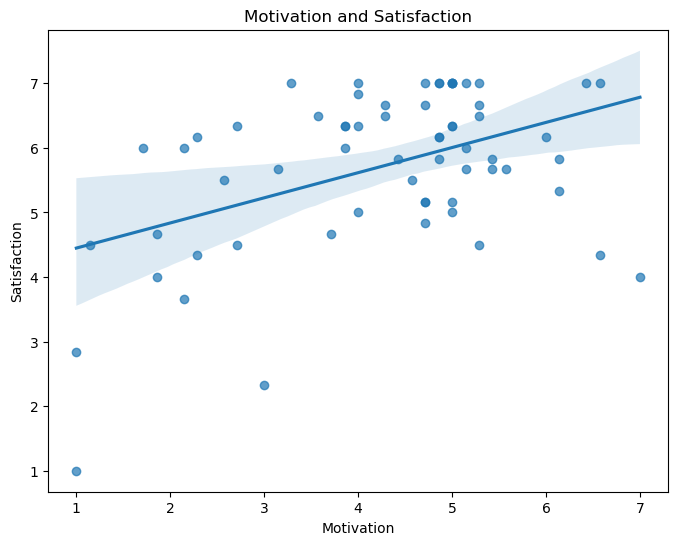

In [72]:
#Visualisation of significant effect
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.regplot(x='motivation', y='satisfaction', data=df, scatter_kws={'alpha': 0.7})
plt.title('Motivation and Satisfaction')
plt.xlabel('Motivation')
plt.ylabel('Satisfaction')
plt.show()